In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [4]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('archive (1)\calories.csv')

In [5]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


# New Section

In [6]:
exercise_data = pd.read_csv('archive (1)\exercise.csv')

In [7]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [9]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
calories_data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [11]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [12]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [13]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
info = [
    "Gender: 0 = Female, 1 = Male",
    "Age in years",
    "Height in centimeters",
    "Weight in kilograms",
    "Duration of exercise (minutes)",
    "Heart Rate achieved (beats per minute)",
    "Body Temperature during exercise (°C)",
    "Calories burnt (Target)"
]

# Print the feature description
for i in range(len(info)):
    print(calories_data.columns[i] + ":\t\t" + info[i])

User_ID:		Gender: 0 = Female, 1 = Male
Gender:		Age in years
Age:		Height in centimeters
Height:		Weight in kilograms
Weight:		Duration of exercise (minutes)
Duration:		Heart Rate achieved (beats per minute)
Heart_Rate:		Body Temperature during exercise (°C)
Body_Temp:		Calories burnt (Target)


In [17]:
calories_data['Calories'].value_counts()

Calories
7.0      161
13.0     142
12.0     137
11.0     137
17.0     136
        ... 
270.0      1
280.0      1
289.0      1
258.0      1
287.0      1
Name: count, Length: 277, dtype: int64

In [18]:
calories_data['Calories'].describe()

count    15000.000000
mean        89.539533
std         62.456978
min          1.000000
25%         35.000000
50%         79.000000
75%        138.000000
max        314.000000
Name: Calories, dtype: float64

In [19]:
label_encoder = LabelEncoder()
calories_data['Gender'] = label_encoder.fit_transform(calories_data['Gender'])
# Now calculate and print the correlation
print(calories_data.corr()['Calories'].abs().sort_values(ascending=False))

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
User_ID       0.001661
Name: Calories, dtype: float64


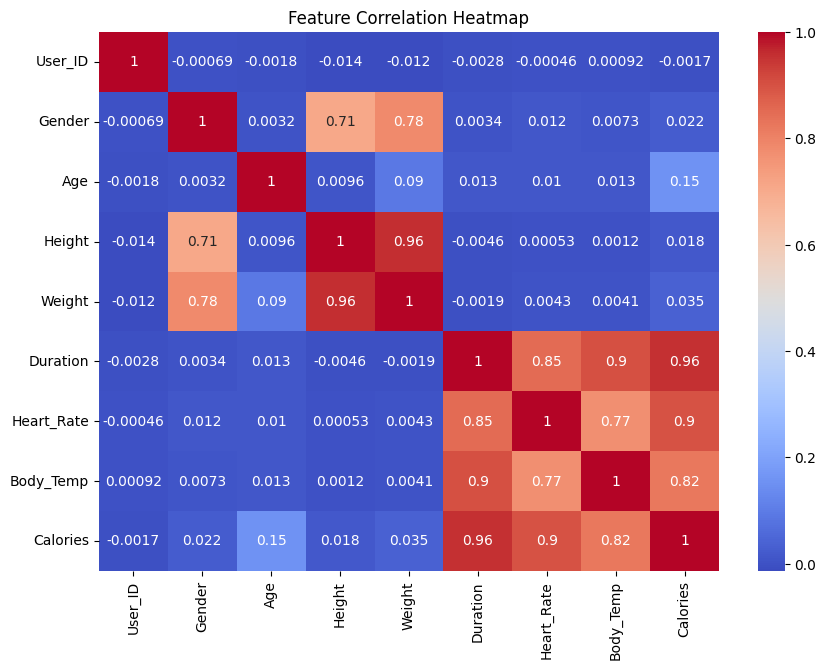

In [20]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(calories_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
# Minimum Age
print('Min Age :', calories_data['Age'].min())
# Maximum Age
print('Max Age :', calories_data['Age'].max())
# Mean (Average) Age
print('Mean Age :', calories_data['Age'].mean())

Min Age : 20
Max Age : 79
Mean Age : 42.7898


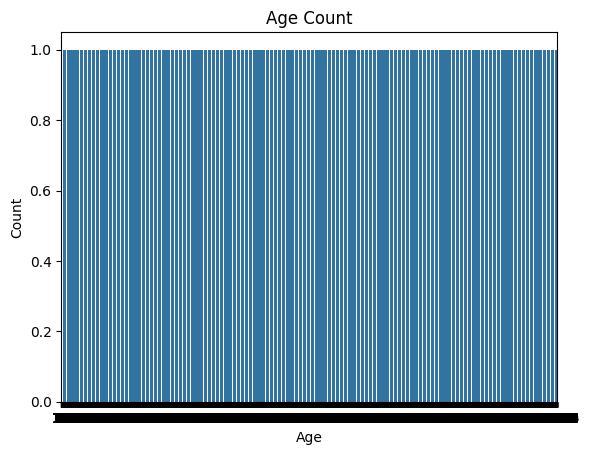

In [22]:
sns.countplot(calories_data.Age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count')
plt.show()

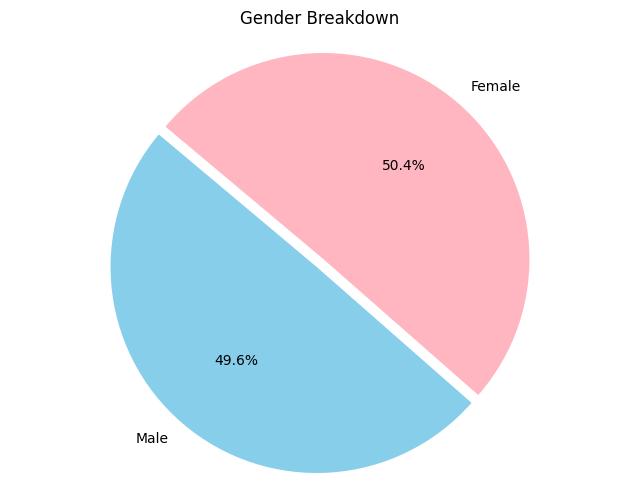

In [23]:
# Pie Chart: Gender Breakdown
male = len(calories_data[calories_data['Gender'] == 1])    # ‘1’ for male (after label encoding)
female = len(calories_data[calories_data['Gender'] == 0])  # ‘0’ for female
labels = ['Male', 'Female']
sizes = [male, female]
colors = ['skyblue', 'lightpink']
explode = (0, 0.05)

plt.figure(figsize=(8,6))  # Size of the figure
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=False,
    startangle=140
)
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.title('Gender Breakdown')
plt.show()

Young People: 7502
Middle Age People: 3454
Elderly People: 4044


C:\Users\ASUTOSH\AppData\Local\Temp\ipykernel_15120\186488758.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young', 'Middle', 'Elderly'], y=[len(Young), len(Middle), len(Elder)],palette=['skyblue', 'lightcoral', 'gold'])


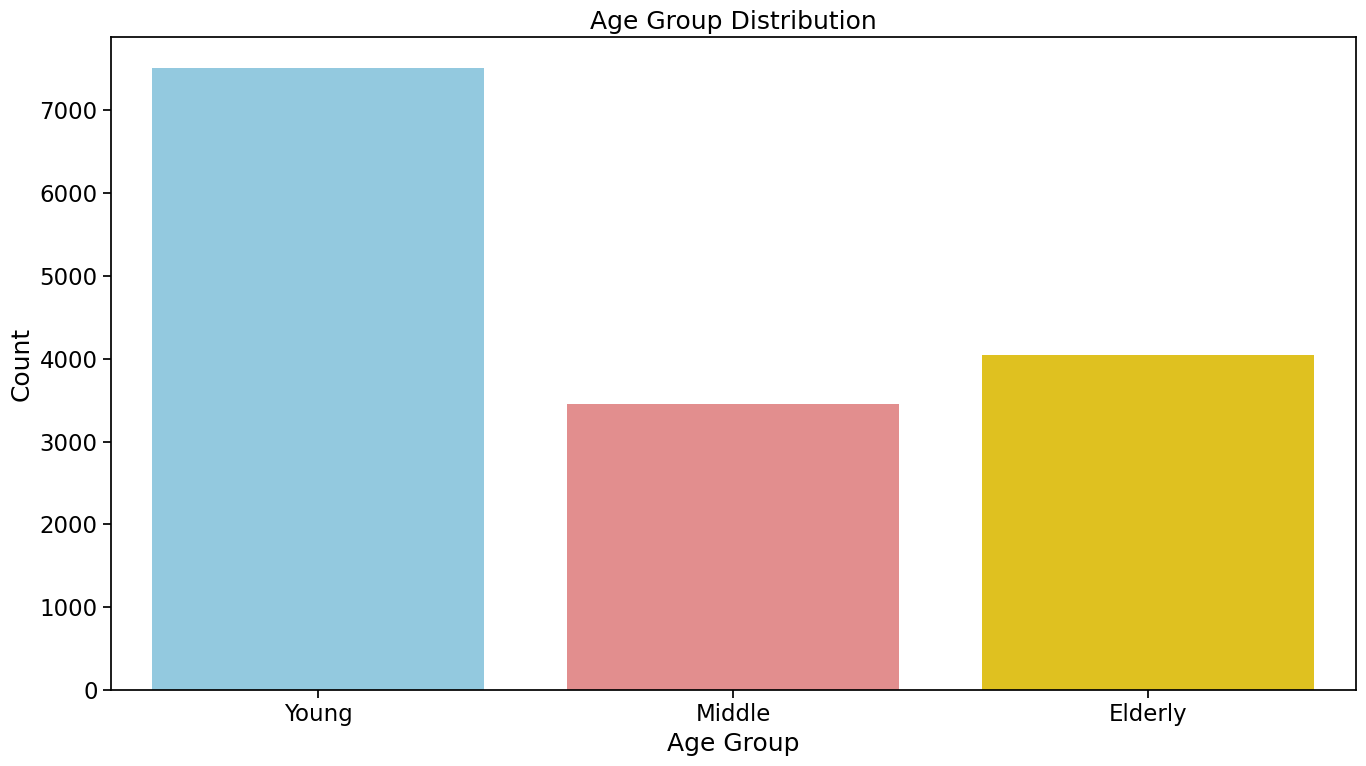

In [24]:
# Group the data based on Age ranges
Young = calories_data[(calories_data['Age'] >= 20) & (calories_data['Age'] < 40)]
Middle = calories_data[(calories_data['Age'] >= 40) & (calories_data['Age'] < 55)]
Elder = calories_data[calories_data['Age'] >= 55]
# Print the number of people in each age group
print("Young People:", len(Young))
print("Middle Age People:", len(Middle))
print("Elderly People:", len(Elder))
# Plotting the bar chart
plt.figure(figsize=(14,8))
sns.set_context('notebook', font_scale=1.5)
sns.barplot(x=['Young', 'Middle', 'Elderly'], y=[len(Young), len(Middle), len(Elder)],palette=['skyblue', 'lightcoral', 'gold'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Calories
7.0      161
13.0     142
12.0     137
11.0     137
17.0     136
        ... 
270.0      1
280.0      1
289.0      1
258.0      1
287.0      1
Name: count, Length: 277, dtype: int64


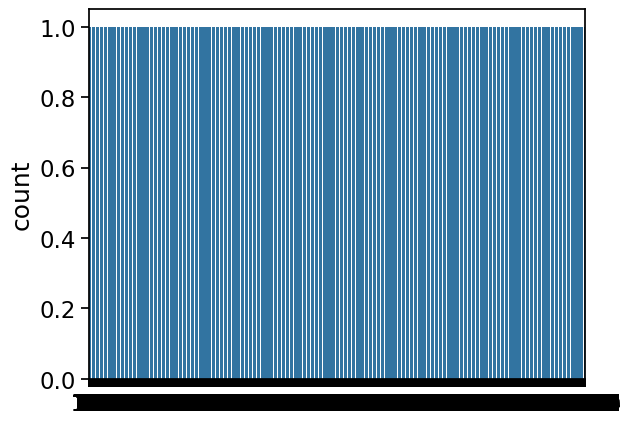

In [25]:
y=calories_data["Calories"]
sns.countplot(y)
calories_temp=calories_data.Calories.value_counts()
print(calories_temp)

In [26]:
# Separate categorical and continuous columns
categorical_val = []
continuous_val = []

for column in calories_data.columns:
    print("----------------------------")
    print(f"{column} : {calories_data[column].unique()}")
    if len(calories_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

# Display the results
print("\nCategorical Columns:", categorical_val)
print("Continuous Columns:", continuous_val)

----------------------------
User_ID : [14733363 14861698 11179863 ... 17271188 18643037 11751526]
----------------------------
Gender : [1 0]
----------------------------
Age : [68 20 69 34 27 36 33 41 60 26 21 66 32 53 39 46 50 67 31 48 29 42 62 38
 25 24 22 74 70 44 61 63 54 47 35 28 77 64 45 57 49 40 55 23 43 52 79 51
 59 30 37 56 58 78 73 76 72 65 71 75]
----------------------------
Height : [190. 166. 179. 154. 151. 158. 175. 186. 146. 177. 157. 171. 182. 156.
 169. 188. 189. 148. 165. 176. 173. 159. 183. 160. 184. 155. 195. 152.
 193. 168. 174. 191. 164. 198. 170. 167. 185. 163. 192. 178. 197. 187.
 144. 202. 201. 181. 136. 180. 194. 143. 149. 172. 153. 147. 199. 161.
 204. 203. 145. 200. 150. 162. 205. 208. 209. 206. 140. 132. 196. 207.
 212. 135. 133. 139. 138. 217. 211. 142. 137. 213. 210. 141. 123. 214.
 127. 218. 126. 134. 222. 219.]
----------------------------
Weight : [ 94.  60.  79.  71.  58.  50.  56.  85.  51.  76.  54.  62.  82.  67.
  65.  86.  93.  59.  75.  73.  8

In [27]:
#  Prepare Features and Target
calories_data = calories_data.drop('User_ID', axis=1)
X = calories_data.drop('Calories', axis=1)
y = calories_data['Calories']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [28]:
# Feature Scaling (Important for KNN and SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Support Vector Regressor
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Step 6: Evaluate Models
def evaluate_model(name, y_test, y_pred):
    print(f"{name} R2 Score: {r2_score(y_test, y_pred)*100:.2f}%")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print("-" * 40)

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree Regression", y_test, y_pred_dt)
evaluate_model("Random Forest Regression", y_test, y_pred_rf)
evaluate_model("KNN Regression", y_test, y_pred_knn)
evaluate_model("SVR", y_test, y_pred_svr)
evaluate_model("Gradient Boosting Regression", y_test, y_pred_gb)


Linear Regression R2 Score: 96.73%
Linear Regression RMSE: 11.49
----------------------------------------
Decision Tree Regression R2 Score: 99.29%
Decision Tree Regression RMSE: 5.34
----------------------------------------
Random Forest Regression R2 Score: 99.82%
Random Forest Regression RMSE: 2.68
----------------------------------------
KNN Regression R2 Score: 99.35%
KNN Regression RMSE: 5.11
----------------------------------------
SVR R2 Score: 99.27%
SVR RMSE: 5.44
----------------------------------------
Gradient Boosting Regression R2 Score: 99.68%
Gradient Boosting Regression RMSE: 3.61
----------------------------------------


C:\Users\ASUTOSH\AppData\Local\Temp\ipykernel_15120\1953486827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regression', 'SVR', 'Gradient Boosting Regression'],


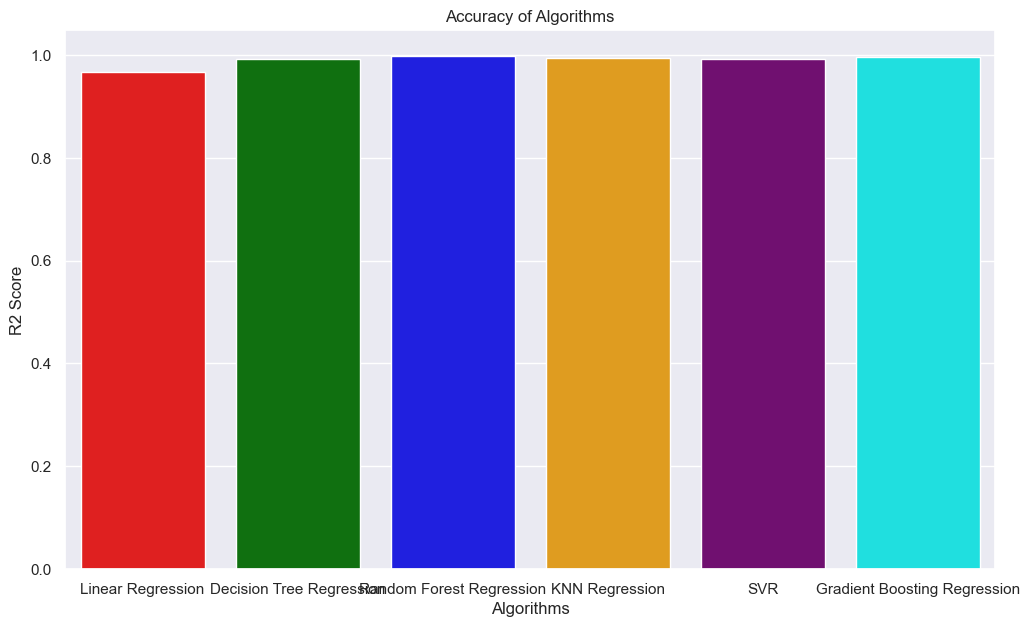

In [29]:
# Store R2 scores in a list
scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_knn),
    r2_score(y_test, y_pred_svr),
    r2_score(y_test, y_pred_gb)
]
# Create the bar plot
sns.set(rc={'figure.figsize': (12, 7)})
plt.xlabel("Algorithms")
plt.ylabel("R2 Score")
plt.title("Accuracy of Algorithms")
sns.barplot(x=['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regression', 'SVR', 'Gradient Boosting Regression'],
            y=scores,
            palette=['red', 'green', 'blue', 'orange', 'purple', 'cyan'])  # List of colors for each bar
plt.show()  # Add this line to display the plot

In [31]:
# Sample input (Gender: 1, Age: 22, Height: 0, Weight: 41.0, Duration: 57.0, Heart_Rate: 0, Body_Temp: 6.6)
input_data = (1, 22, 0, 41.0, 57.0, 0, 6.6)

# Create a DataFrame with column names
input_df = pd.DataFrame([input_data], columns=X.columns)  # X is your original feature data

# Predicting using the DataFrame
input_prediction = rf.predict(input_df)
print(f"\nCalories Burnt Prediction for user input: {input_prediction[0]}")


Calories Burnt Prediction for user input: 138.72


In [32]:
import pickle

# Save the trained model to a file
with open('calories_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model saved as 'calories_model.pkl'")

Model saved as 'calories_model.pkl'


In [33]:

# Input from user
gender = int(input("Enter Gender (0 for Female, 1 for Male): "))
age = int(input("Enter Age: "))
height = float(input("Enter Height (in cm): "))
weight = float(input("Enter Weight (in kg): "))
duration = float(input("Enter Exercise Duration (in minutes): "))
heart_rate = int(input("Enter Heart Rate: "))
body_temp = float(input("Enter Body Temperature (in °C): "))

# Making prediction
user_input = np.array([[gender, age, height, weight, duration, heart_rate, body_temp]])

# Convert user_input to a DataFrame with column names
user_input_df = pd.DataFrame(user_input, columns=X.columns)

user_prediction = rf.predict(user_input_df)  # Use the DataFrame for prediction
print(f"Calories Burnt Prediction: {user_prediction[0]}")

Calories Burnt Prediction: 105.2
